# 1.この課題の目的
スクラッチを通してK-meansを理解する
クラスタ分析を行う
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

# 【問題1】K-meansクラスの作成
非階層クラスタリングの手法であるK-meansのクラスを作成してください。名前はScratchKMeansとしてください。

教師なし学習であるクラスタリングになるため、ここまでの回帰や分類とは異なるパイプラインを作成することになります。

メソッドやパラメータなどはscikit-learnを参考にしてください。

[sklearn.cluster.KMeans — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

## クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しました。スクラッチの過程で利用してください。

このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

シンプルデータセット3

In [1]:
# X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

## 目的関数
K-meansは以下のクラスタ内誤差平方和（SSE, Sum of Squared Errors）を最小化する 
r
n
k
 と 
μ
k
 を求めることで学習を行います。この数式自体は学習時にはコーディングする必要がありませんが、クラスタ数 
K
 を決めるためのエルボー法で使います。エルボー法の実装は問題2で扱います。
 
$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$ : データ点のインデックス

$k$ : クラスタのインデックス

$X_n$: $n$番目のデータ点

$\mu_k$: $k$番目の中心点

$r_{nk}$: データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

## 学習
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。

- 中心点 $\mu_k$を固定した上で$J$を最小化する $r_{nk}$を選ぶ。
- $r_{nk$を固定した上で $J$を最小化する$\mu_k$を選ぶ。

具体的には以下を行います。

まずは
- 中心点$\mu_k$の初期値を決める。

その後以下を繰り返します。
- データ点 $X_n$を最も近い$\mu_k$に割り当てる。
- 中心点$\mu_k$を$k$番目のクラスタに割り当てられる全てのデータ点$X_n$の平均値(重心)に移動する。

次のどれかの条件を満たしたらこれを止めます。
- 繰り返しが指定した回数に到達する。
- 中心点$/mu_k$と重心の差が指定した許容値以下になる。
- データ点$X_n$のクラスタへの割り当てが変化しなくなる。
さらに、
- ここまでの一連の流れを指定した回数繰り返す。
- SSEが最小になったものを最終的な学習結果とする。

これで学習が完了します。

考慮すべき点として、空のクラスタが生じる可能性があります。これを防ぐためには以下の動作を実装します。

- $k$番目のクラスタに割り当てられるデータ点$X_n$が存在しない場合、中心点$¥mu_k$ を最も離れているデータ点の場所に移動する。

繰り返し回数や許容値などのハイパーパラメータの値はscikit-learnのデフォルト値を参考にしてください。

## ユークリッド距離
K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル$p$,$q$に対しては以下の数式で表現できます。
$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$
NumPyにはこの関数が<font color="Red">np.linalg.norm</font>として用意されているため使用してください。

<font color="Red">参考</font>

[numpy.linalg.norm — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html)

## 初期値
K-meansの学習結果は中心点$μ$の初期値に影響を受けます。

最もシンプルな初期値の決定方法は、データ点 $X_n$の中からランダムに$k$個選ぶことです。今回はこれを実装してください。

K-meansのより良い初期値の選択方法については研究が行われており、いろいろな方法が提案されています。

## 推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

データ点 $X_n$に対し、学習で決まった中心点 $μ_k$の元、$J$を最小化する $ r_{nk}$を選ぶ。
具体的には次のことです。
- データ点 $X_n$を最も近い$\mu_k$に割り当てる。

In [2]:
## クラスのインポート

In [3]:
# クラス作成時に使用するクラス
import numpy as np
import pandas as pd

## 前処理に使用するクラス
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# データの準備時に使用するクラス
from sklearn.datasets import make_blobs

# ScratchKMeansクラス内で使用するクラス
import random
from numpy import linalg as LA
import math



# 散布図を描画する際に使用するクラスと設定
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## データ準備(シンプルデータセット3)

In [4]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

## ScratchKMeansクラス

In [5]:
class ScratchKMeans():
    """
    k最近傍法のスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      形成するクラスターの数と生成する重心の数。
    n_init : int
      k-meansアルゴリズムが異なる重心シードで実行される回数。
    max_iter : int
      1回の実行に対するk-meansアルゴリズムの最大反復回数。
    tol : int
      収束を宣言する慣性に関する相対許容誤差

    Attributes
    ----------
    self.n_samples_ : 入力データのサンプル数
    self.cluster_centers_ : 中心点の座標(計算用)
    self.labels_ : 各点のラベル
    self.n_iter_ : 中心点の更新回数
    self.all_cluster_centers_ : 中心点の座標(データ比較用)
    self.sse_ :　SSEの値 
    self.tol_flag_ : 重心点と中心点のノルムの誤差の判定フラグ
    """

    def __init__(self, n_clusters, n_init, max_iter, tol):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.n_samples_ = None
        self.cluster_centers_ = None
        self.labels_ = None
        self.n_iter_ = None
        self.all_cluster_centers_ = None
        self.sse_ = None
        self.tol_flag_ = None
        
    def fit(self, X):
        """
        最適な中心点を求める

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
            
        Returns
        -------
        """
        # インスタンス変数の初期化
        self.all_cluster_centers_ = []
        self.n_samples_ = len(X)
        self.cluster_centers_ = np.zeros(self.n_clusters)
        self.labels_ = np.zeros(self.n_samples_)
        self.all_cluster_centers_ = []
        self.sse_ = []
        
        
        # 入力データをnumpy配列に変換(dataframeの入力された際も計算可能とする)
        X = np.array(X)

        # self.n_init回、中心点の初期値を変更して実行する
        for i in range(self.n_init):
            self._choice(X)
            
            # self.max_iter_回、クラスタリング、中心点の変更を繰り返す
            for _ in range(self.max_iter):
                
                #　クラスタリングの結果が既存のクラスと同じであればbreak
                if ((self.labels_ == self._clustering(X)).all()):
                    break
                    
                self.labels_ = self._clustering(X)
                    
                # 中心点を更新
                self._update_center_point(X)
                
                # 重心点と中心点の距離がself.tol未満となったら、break
                if self.tol_flag_ == True:
                    break
            
            # 更新後の中心点を保存
            self.all_cluster_centers_.append(self.cluster_centers_)
                    
            # SSEを計算
            self._compute_sse(X)
        # SSEが最小となる中心点の座標を格納
        self.cluster_centers_ = self.all_cluster_centers_[np.argmin(self.sse_)]
        
        return
    

  
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # ラベルを予測
        label_predict = self._clustering(X)
        
        return label_predict
    
    
    
    def _choice(self, X):
        """
        入力データXからself.n_clusters分のデータをランダムサンプリングする。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
    
        # 入力データのindexの情報を取得
        indices= np.arange(len(X))

        # 取得したindexからself.n_cluster_個だけ、重複なしでランダムサンプリングする
        md_indiceis = np.random.choice(indices, size=self.n_clusters)

        # ランダムサンプリングしたデータ
        self.cluster_centers_ = X[md_indiceis]

        return

    

    def _clustering(self, X):

        """
        現在の中心点により入力データをクラスタリングする

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # クラスタリング結果を格納するリストを初期設定
        labels= []

        # 中心点を1つずつ出していく
        for center in self.cluster_centers_:

            # 入力座標と各中心点とのノルムを計算しリストに格納 (リストの中身→[中心点1の時のノルム][中心点2の時のノルム]...)
            labels.append(LA.norm(X- center, axis=1))
   
        # ノルムが最小の中心点を設定 (リストの中身　→　0, 1, 2, 0,...)
        labels = np.argmin(labels, axis=0).reshape(-1,1)
        
        return labels

    
    def _update_center_point(self, X):
        """
        現在の中心点により入力データをクラスタリングする

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # 各ラベルを1つずつ取り出す
        for num, cls in enumerate(np.unique(self.labels_)):
            
            # 各ラベルのクラス毎のindex列を取り出す
            index = np.where(self.labels_== cls)[0]

            # X座標、Y座標毎(各列毎の合計の為、axis=0)の値の合計 / 各クラスターを計算
            center_of_gravity = np.sum(X[index], axis=0) / len(index)
            
            # 重心点と中心点の距離がself.tol未満となったら、self.tol_flagをTrueにする
            if LA.norm(self.cluster_centers_[num] - center_of_gravity) < self.tol:
                self.tol_flag_ = True 

            # 各ラベルの中心点を更新
            self.cluster_centers_[num] = center_of_gravity

            
    def _compute_sse(self, X):
        """
        クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # SSEの初期値
        sse = 0

        # 各ラベルを1つずつ取り出す

        for num, cls in enumerate(np.unique(self.labels_)):

            # 各ラベルのクラス毎のindexを取り出す
            index = np.where(self.labels_== cls)[0]
   
            # SSEを計算(各クラスタの全ての座標と中心点のノルムの合計)
            sse += np.sum(LA.norm(X[index] - self.cluster_centers_[num])**2)

        # 計算結果を格納
        self.sse_.append(sse)

        return

## 学習・予測

In [6]:
# インスタンス作成
cls = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=0.1)

# 学習
cls.fit(X)

# 予測
predict = cls.predict(X)
predict[:5]

array([[2],
       [3],
       [2],
       [2],
       [2]])

In [7]:
# 学習データのdataframe化
X_df = pd.DataFrame(X, columns=['X', 'Y'])
X_df.head()

,X,Y
0,0.720868,3.713471
1,-1.894684,7.968985
2,1.356789,4.364625
3,1.053744,4.492869
4,1.591415,4.904977


In [8]:
# 予測値のdataframe化
pred_df = pd.DataFrame(predict, columns=['label'])
pred_df.head()

,label
0,2
1,3
2,2
3,2
4,2


In [9]:
# 学習データと予測結果を1つのdataframeにする
last = pd.concat([X_df, pred_df], axis=1)
last.head()

,X,Y,label
0,0.720868,3.713471,2
1,-1.894684,7.968985,3
2,1.356789,4.364625,2
3,1.053744,4.492869,2
4,1.591415,4.904977,2


Text(0.5, 1.0, 'prediction label')

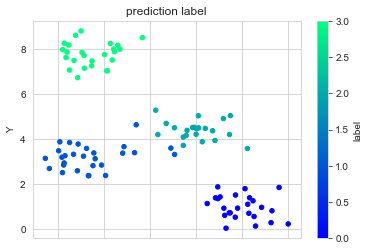

In [10]:
# 散布図の表示
last.plot(kind="scatter", x='X',y='Y',c="label", cmap="winter")
plt.title("prediction label")

# 【問題2】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要があるが、その判断方法としてエルボー法があります。

SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。

このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [11]:
# 各クラスタ数の時のMSEを格納するリスト
mse_list = []

# 1〜10までクラスタ数を変化させる
for claster_num in range(1,11):
    
    # インスタンス作成
    cls2 = ScratchKMeans(n_clusters=claster_num, n_init=10, max_iter=100, tol=0.1)
    
    # 学習
    cls2.fit(X)
    
    #　各クラスタ数で学習した際の最も低い値のMSEを取得
    mse_list.append(min(cls2.sse_))    

## 中心点の個数の違いによるSSEの変化

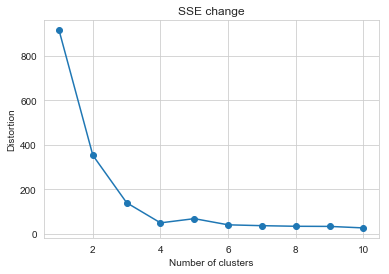

In [12]:
plt.plot(range(1,11),mse_list,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('SSE change')
plt.show()

# 3.クラスタリング分析
## <u>卸売業者のデータ分析M</u>
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

[UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

Data Folderの中から<font color="Red">Wholesale customers data.csv</font>をダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。<font color="Red">Region</font>と<font color="Red">Channel</font>は取り覗き、金額のデータでK-meansを利用します。

次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

PCAのサンプルコード

# データ読み出し

In [14]:
# データフレームの呼び出し
base_df = pd.read_csv('Wholesale customers data.csv')
# base_df = pd.read_csv('Wholesale customers data.csv', index_col=0)
base_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# データを対数変換

In [15]:
base_df_log = base_df.apply(np.log)
base_df_log.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


# RegionとChannel以外の列を抽出

In [16]:
df = base_df_log.iloc[:,2:]
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


# 次元削減

In [17]:
# PCAクラスのインスタンスを作成(2つの特徴量に絞るよう設定)
pca = PCA(n_components = 2)

# 「Wholesale customers Data Set」で学習
pca = pca.fit(df)

# 次元削減
data_pca = pca.transform(df)

data_pca[:5]

array([[-1.75098532, -0.07051523],
       [-1.80036534, -0.86975357],
       [-1.89373597, -1.67662072],
       [ 1.12731297, -1.45798229],
       [-0.79671147, -2.46086569]])

# 【問題4】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

## 最適だと思われるクラスタ数→2
### 理由
- 問題2で作成したエルボー法を利用した図より、クラスタ数2以降はMSEは低下しているが、その変化量はクラスタ数1~2までの間の時と比較し、大幅に小さな値となっていることがわかる。この事から今回の課題で用いられたデータセットにてk最近傍法を行う際はクラスタ数２以上が適していると考えられる。

In [18]:
# PCAで次元削減したデータ
pca_df = pd.DataFrame(data_pca, columns=['X', 'Y'])
pca_df.head()

,X,Y
0,-1.750985,-0.070515
1,-1.800365,-0.869754
2,-1.893736,-1.676621
3,1.127313,-1.457982
4,-0.796711,-2.460866


In [19]:
# ScratchKMeansクラスのインスタンスを作成
cls = ScratchKMeans(n_clusters=12, n_init=10, max_iter=100, tol=0.1)

# 学習
cls.fit(pca_df)

# 予測データ
pred_df = pd.DataFrame(cls.labels_, columns=['label'])
pred_df.head()

,label
0,11
1,11
2,4
3,5
4,4


In [20]:
# 学習データと予測データを結合
result1 = pd.concat([pca_df, pred_df], axis=1)
result1.head()

,X,Y,label
0,-1.750985,-0.070515,11
1,-1.800365,-0.869754,11
2,-1.893736,-1.676621,4
3,1.127313,-1.457982,5
4,-0.796711,-2.460866,4


# 散布図(全てのデータを使用)

Text(0.5, 1.0, 'prediction label')

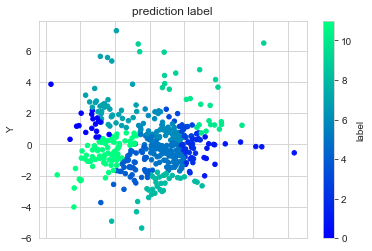

In [21]:
result1.plot(kind="scatter", x='X',y='Y',c="label", cmap="winter")
plt.title("prediction label")

# エルボー法の実施

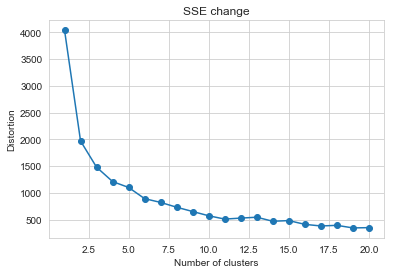

In [22]:
# 各クラスタ数の時のMSEを格納するリスト
sse_list = []

# 1〜10までクラスタ数を変化させる
for claster_num in range(1,21):
    
    # インスタンス作成
    cls3 = ScratchKMeans(n_clusters=claster_num, n_init=10, max_iter=100, tol=0.1)
    
    # 学習
    cls3.fit(data_pca)
    
    #　各クラスタ数で学習した際の最も低い値のMSEを取得
    sse_list.append(min(cls3.sse_))  
    
plt.plot(range(1,21),sse_list,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('SSE change')
plt.show()

# 【問題5】既知のグループとの比較
<font color="Red">Region</font>と<font color="Red">Channel</font>はK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

# 確認結果
## RegionとChannelのデータについて
- カテゴリカルデータでRegionとChannel間で相関関係はないように思われる。→　散布図よりプロットされたクラスタは全てまとまっておらず、また直線上に配置されるようになっていることから。

## Region、Channel以外のデータについて
- データに相関関係及び連続性があるように見える　→　散布図のクラスタが近い位置でまとまっている為。

# RegionとChannelデータの抽出

In [23]:
region_np = np.array(base_df.iloc[:,0]).reshape(-1,1)
region_np.shape

(440, 1)

In [24]:
np.unique(region_np)

array([1, 2])

In [25]:
channel_np = np.array(base_df.index).reshape(-1,1)
channel_np.shape

(440, 1)

In [26]:
np.unique(channel_np)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [27]:
re_df = pd.DataFrame(region_np, columns=['Region'])
re_df.head()

,Region
0,2
1,2
2,2
3,1
4,2


In [28]:
ch_df = pd.DataFrame(channel_np, columns=['Channel'])
ch_df.head()

,Channel
0,0
1,1
2,2
3,3
4,4


In [29]:
ch_re_df = pd.concat([ch_df, re_df], axis=1)
ch_re_df.head()

,Channel,Region
0,0,2
1,1,2
2,2,2
3,3,1
4,4,2


In [30]:
cls = ScratchKMeans(n_clusters=100, n_init=10, max_iter=100, tol=0.1)

In [31]:
cls.fit(ch_re_df)

In [32]:
pred_ch_re = pd.DataFrame(cls.labels_, columns=['label'])
pred_ch_re.head()

,label
0,73
1,88
2,44
3,40
4,40


In [33]:
result2 = pd.concat([ch_re_df, pred_ch_re], axis=1)
result2.head()

,Channel,Region,label
0,0,2,73
1,1,2,88
2,2,2,44
3,3,1,40
4,4,2,40


# RegionとChannelデータの散布図

Text(0.5, 1.0, 'prediction label')

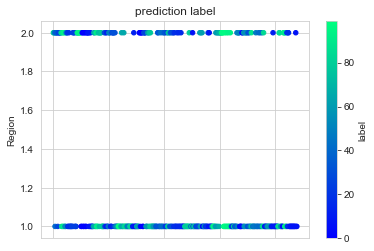

In [34]:
result2.plot(kind="scatter", x='Channel',y='Region',c="label", cmap="winter")
plt.title("prediction label")

# Region、Channel以外のデータの散布図

Text(0.5, 1.0, 'prediction label')

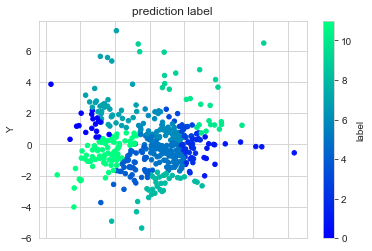

In [35]:
result1.plot(kind="scatter", x='X',y='Y',c="label", cmap="winter")
plt.title("prediction label")

# 【問題6】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

ヒント

前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。

[pandas.DataFrame.groupby — pandas 0.23.4 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

# 今回の課題においての有益な情報の定義
## →<font color="Red"><u>売上・利益の向上を行う為の情報</u></font>と定義


# データ分析の結果により検討した有益な情報
## 用語の意味
- Hoterica(ホテル・レストラン・カフェ) Retail(小売業者)
- Lisbon(リスボン)、Oporto(ポルト)、Other Region(その他の地域)



##  ◯取引先の数について
### 1. Retailの取引先を増やす


- 理由:全体的な取引先を増やす事は、売上・利益の向上には必要ではあるが、現状、Retail(その他)の取引数はHoterica(ホテル・レストラン・カフェ)の半分程度の為、特にRetailの取引先を増やす事が重要と思われる。

## ◯商品について
### 1. RetailへのMilk・Groceryの取引数を増やす
- 理由:Retail(その他)へのMilk(乳製品)Grocery(食料品)の１取引あたりの額が、HoReCa(ホテル・レストラン・カフェ)と比較し高い傾向がある

### 2. Region3でのRetailに対してのGroceryの取引を増やす
- 理由:1回の取引額がその他の地域Region1(Lisbon), Region2(Oporto)、その他の顧客Hotericaと比較し高い為。

### 3. FrozenのHorecaに対しての取引を増やす
- 理由:1回の取引額がその他の地域Region1(Lisbon), Region2(Oporto)、その他の顧客Hotericaと比較し高い為。



# データセットの情報
## ①事前情報
- データの入手先　→　カリフォルニア大学アーバイン校
- データセットの概要　→　ポルトガルの卸売業者の顧客のデータ（2011年(通年)、通貨単位の年間支出）。大元のデータベースからサンプリングしたデータセット。

## ②データについて
### 基本情報
- 特徴量　8個


1. FRESH  ：生鮮品の年間支出（通貨単位）
2. MILK   ：乳製品の年間支出（通貨単位）
3. GROCERY：食料品の年間支出（通貨単位）
4. FROZEN ：冷凍品の年間支出（通貨単位）
5. DETERGENTS_PAPER：洗剤、紙製品の年間支出（通貨単位）
6. DELICATESSEN：デリカテッセン(惣菜)の年間支出（通貨単位）
7. CHANNEL：販売チャネル - Horeca（ホテル/レストラン/カフェ）、卸売業者
8. REGION ：消費地域 - リスボン、ポルト、その他

### 要的統計量(公式ページから確認)


| Product          | Minimum | Maximum | Mean    | Std Deviation |
|------------------|---------|---------|---------|---------------|
| FRESH            | 3       | 112151  | 12000.3 | 12647.329     |
| MILK             | 55      | 73498   | 5796.27 | 7380.377      |
| GROCERY          | 3       | 92780   | 7951.28 | 9503.163      |
| FROZEN           | 25      | 60869   | 3071.93 | 4854.673      |
| DETERGENTS_PAPER | 3       | 40827   | 2881.49 | 4767.854      |
| DELICATESSEN     | 3       | 47943   | 1524.87 | 2820.106      |



| REGION       | Frequency |
|--------------|-----------|
| Lisbon       | 77        |
| Oporto       | 47        |
| Other Region | 316       |
| Total        | 440       



| CHANNEL | Frequency |
|---------|-----------|
| Horeca  | 298       |
| Retail  | 142       |
| Total   | 440       |



## ③データの内容を確認
### <u>ChannelとRegionの値が何を示しているのか？</u>
### 1. Channelの値毎の各特徴量の値を確認
#### 確認した事→ <u>Channel 1</u> は<font color="Red">Horeca</font>　<u>Channel 2</u> は　<font color="Red">Retail</font>であることを確認。
#### 理由→以下のデータフレームのDelicassen(惣菜の年間支出)の値がHorecaとRetailのそれぞれの頻度値と一致している

In [36]:
base_df.groupby(['Channel']).count()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,298,298,298,298,298,298,298
2,142,142,142,142,142,142,142


### 2. Regionの値毎の各特徴量の値を確認
#### 確認した事→ <u>Region 1</u> は<font color="Red">Lisbon</font>　<u>Region 2</u> は　<font color="Red">Oporto</font>　<u>Region 3</u> は<font color="Red">Other Region</font>であることを確認。
#### 理由→以下のデータフレームのDelicassen(惣菜の年間支出)の値がRegionのHorecaとRetailのそれぞれの頻度値と一致している

In [37]:
base_df.groupby(['Region']).count()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,77,77,77,77,77,77,77
2,47,47,47,47,47,47,47
3,316,316,316,316,316,316,316


## ④データ分布を確認
### 4-1 Channel毎のデータフレーム

In [38]:
# Horecaのみのデータ
df_Channel1 = base_df[base_df['Channel']==1].drop(['Channel'],axis=1)
# Retailのみのデータ
df_Channel2 = base_df[base_df['Channel']==2].drop(['Channel'],axis=1)

### 4-2 Region毎のデータフレーム

In [39]:
# Lisbonのみのデータ
df_Region1 = base_df[base_df['Region']==1].drop(['Region'],axis=1)
# Oportoのみのデータ
df_Region2 = base_df[base_df['Region']==2].drop(['Region'],axis=1)
# Other Regionのみのデータ
df_Region3 = base_df[base_df['Region']==3].drop(['Region'],axis=1)

### Fresh(生鮮食品の売り上げの分布)
### 4-3 Channel毎のデータの推移→特に有益な情報な無し。

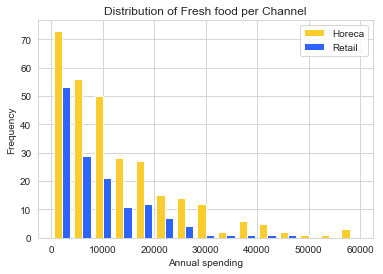

In [40]:
plt.hist([df_Channel1['Fresh'],df_Channel2['Fresh']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Fresh food per Channel')
plt.legend()

### 4-4 Region毎のデータの推移→特に有益な情報な無し。

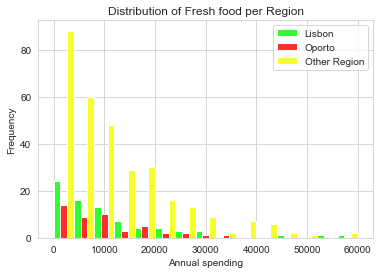

In [41]:
plt.hist([df_Region1['Fresh'],df_Region2['Fresh'],df_Region3['Fresh']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Fresh food per Region')
plt.legend();

### Milk(乳製品)の分布
### 4-5 Channel毎のデータの推移→Retailの方が、取引先あたりの卸売額が大きい傾向がある

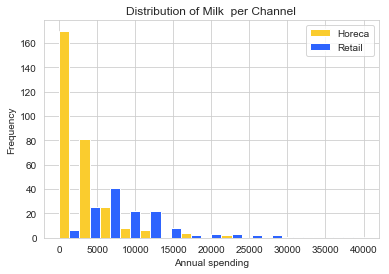

In [42]:
plt.hist([df_Channel1['Milk'],df_Channel2['Milk']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,40000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Milk  per Channel')
plt.legend();

### 4-6 Region毎のデータの推移→特に有益な情報な無し。

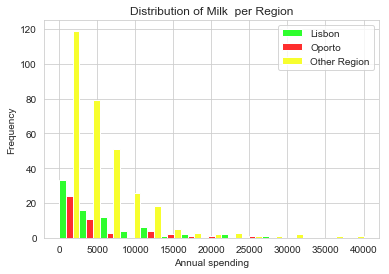

In [43]:
plt.hist([df_Region1['Milk'],df_Region2['Milk'],df_Region3['Milk']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,40000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Milk  per Region')
plt.legend();

### Grocery(食料品)の分布
### 4-7 Channel毎のデータの推移→Retailの方が、取引先あたりの卸売額が大きい傾向がある

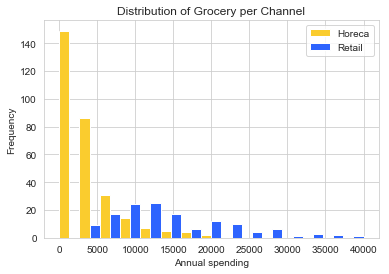

In [44]:
plt.hist([df_Channel1['Grocery'],df_Channel2['Grocery']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,40000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Grocery per Channel')
plt.legend();

### 4-8 Region毎のデータの推移→Other Region方が、取引先あたりの卸売額が大きい傾向がある。

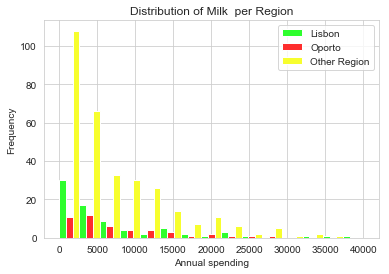

In [45]:
plt.hist([df_Region1['Grocery'],df_Region2['Grocery'],df_Region3['Grocery']],
        bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,40000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Milk  per Region')
plt.legend();

### Frozen(冷凍食品)の分布
### 4-9 Channel毎のデータの推移→Horecaの方が、取引先あたりの卸売額が大きい傾向がある

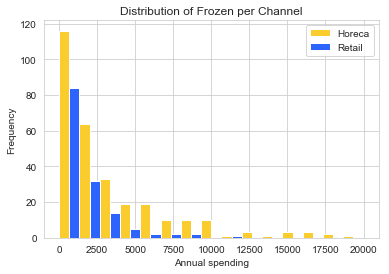

In [46]:
plt.hist([df_Channel1['Frozen'],df_Channel2['Frozen']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,20000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Frozen per Channel')
plt.legend();

### 4-10 Region毎のデータの推移→特に有益な情報な無し。

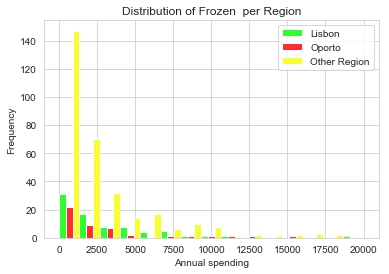

In [47]:
plt.hist([df_Region1['Frozen'],df_Region2['Frozen'],df_Region3['Frozen']],
        bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,20000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Frozen  per Region')
plt.legend();

### Detargents_Paper(洗剤、紙製品)の分布
### 4-11 Channel毎のデータの推移→洗剤、紙製品はRetailの方が、<u>取引先あたりの卸売額が大きい傾向がある</u>

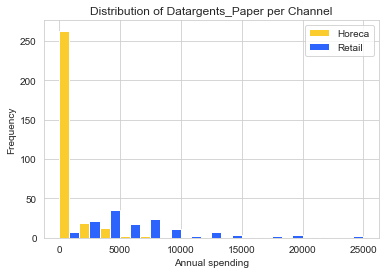

In [48]:
plt.hist([df_Channel1['Detergents_Paper'],df_Channel2['Detergents_Paper']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,25000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Datargents_Paper per Channel')
plt.legend();

### 4-12 Region毎のデータの推移→特に有益な情報な無し。

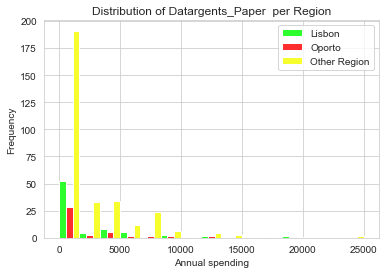

In [49]:
plt.hist([df_Region1['Detergents_Paper'],df_Region2['Detergents_Paper'],df_Region3['Detergents_Paper']],
        bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,25000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Datargents_Paper  per Region')
plt.legend();

### Delicatessen(惣菜)の分布
### 4-13 Channel毎のデータの推移→特に有益な情報な無し。¶

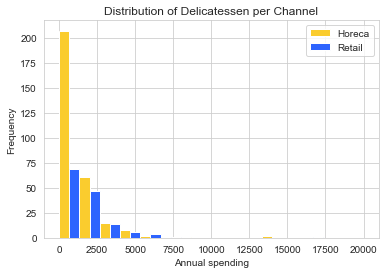

In [50]:

plt.hist([df_Channel1['Delicassen'],df_Channel2['Delicassen']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,20000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Delicatessen per Channel')
plt.legend();

### 4-14 Region毎のデータの推移→特に有益な情報な無し。

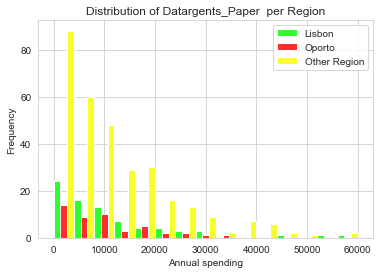

In [51]:
plt.hist([df_Region1['Fresh'],df_Region2['Fresh'],df_Region3['Fresh']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.ylabel('Frequency')
plt.xlabel('Annual spending')
plt.title('Distribution of Datargents_Paper  per Region')
plt.legend();

## ⑤クロス集計を実施
### <u>Regionでグループ化</u>
### 5-1 取引先の数→Other Region, Lisbon, Oportoの順で多い

In [52]:
base_df['Total'] = base_df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)
base_df[['Region','Total']].groupby(['Region']).count()

,Total
Region,
1,77
2,47
3,316


### 5-2 Region毎の取引額の合計→Region3(Other) Region1(Lisbon), Region2(Oporto)の順で多い

In [53]:
base_df.drop('Channel',axis=1).groupby(['Region']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,854833,422454,570037,231026,204136,104327,2386813
2,464721,239144,433274,190132,173311,54506,1555088
3,3960577,1888759,2495251,930492,890410,512110,10677599


### 5-3 取引先あたりの取引額の平均→Region3(Other) Region2(Lisbon), Region1(Oporto)の順で多い
- Region2(Lisbon)は取引額の合計では最低だが、取引額の平均では第２位となっており、<u>1回あたりの取引額が高いことがわかる。</u>

In [54]:
base_df.drop('Channel',axis=1).groupby(['Region']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
2,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
3,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


### <u>Channelでグループ化</u>
### 5-4 取引先の数を見てみる→取引先の数は、Horecaが倍近く多い

In [55]:
base_df[['Channel','Total']].groupby(['Channel']).count()

,Total
Channel,
1,298
2,142


#### Channel毎の取引額
- Horecaは、Retailに対して倍近い取引があるにもかかわらず、<u>卸売額はそれほど大きな差がない</u>
- Fresh, Grocery, Frozenの順で取引額が多い